In [0]:
# Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [74]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Read the data
matches = pd.read_csv('/content/drive/My Drive/FTMLE - Tonga/Week_3/assignments/datasets/06-world-cup/matches.csv')
players = pd.read_csv('/content/drive/My Drive/FTMLE - Tonga/Week_3/assignments/datasets/06-world-cup/players.csv')
winners = pd.read_csv('/content/drive/My Drive/FTMLE - Tonga/Week_3/assignments/datasets/06-world-cup/winners.csv')

#Data cleaning

In [0]:
# Check duplicates
matches[matches.duplicated(subset='MatchID',keep=False)].sort_values(by='MatchID')
players[players.duplicated(subset='MatchID',keep=False)].sort_values(by='MatchID')
winners.duplicated(subset=None, keep='first').sum()

In [0]:
# Remove duplicates in matches
matches = matches.drop_duplicates(subset="MatchID", keep="first")

In [0]:
# Drop unescessary column 
players.drop(columns = ['Position','Event'], inplace = True)

In [0]:
# Check null values
matches.isnull().sum()
players.isnull().sum()
winners.isnull().sum()

In [0]:
# Removing null values in matches
matches = matches[matches["Year"].notnull()]

In [0]:
# Convert float value to interger
matches['Year'] = matches['Year'].astype(int)

In [0]:
# Fix font and name errors
winners["Winner"]=winners["Winner"].replace("Germany FR","Germany")
winners["Runners-Up"]=winners["Runners-Up"].replace("Germany FR","Germany")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">United Arab Emirates',"United Arab Emirates")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("C�te d'Ivoire","Côte d’Ivoire")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Republic of Ireland',"Republic of Ireland")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Serbia and Montenegro',"Serbia and Montenegro")
matches["Home Team Name"] = matches["Home Team Name"].str.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("Soviet Union","Russia")
matches["Home Team Name"] = matches["Home Team Name"].str.replace("Germany FR","Germany")

matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">United Arab Emirates',"United Arab Emirates")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("C�te d'Ivoire","Côte d’Ivoire")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Republic of Ireland',"Republic of Ireland")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Bosnia and Herzegovina',"Bosnia and Herzegovina")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Serbia and Montenegro',"Serbia and Montenegro")
matches["Away Team Name"] = matches["Away Team Name"].str.replace('rn">Trinidad and Tobago',"Trinidad and Tobago")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("Germany FR","Germany")
matches["Away Team Name"] = matches["Away Team Name"].str.replace("Soviet Union","Russia")


##1. Summary of Worldcup infomation: team, winner, matches, goal 

###1.1 Total attendence of world cups by year

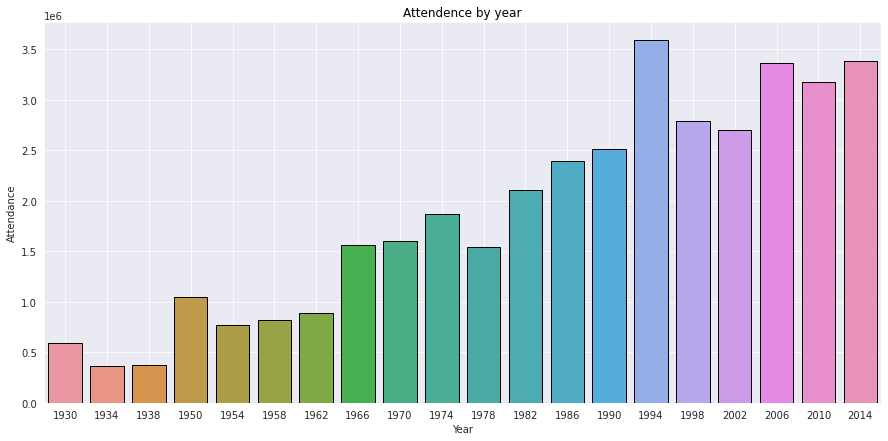

In [84]:
att = matches.groupby("Year")["Attendance"].sum().reset_index()

sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
sns.barplot(att["Year"], att["Attendance"], linewidth = 1, edgecolor="k"*len(att))
plt.grid(True)
plt.title("Attendence by year", color='k')
plt.show()

###1.2 Average attendence by year

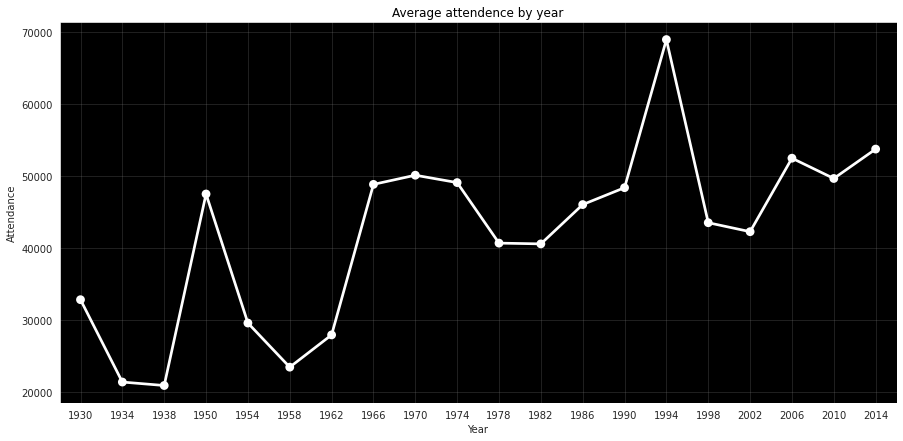

In [83]:
att1 = matches.groupby("Year")["Attendance"].mean().reset_index()

plt.figure(figsize=(15,7))
ax = sns.pointplot(att1["Year"], att1["Attendance"], color="w")
ax.set_facecolor("k")
plt.grid(True, color="grey", alpha=.3)
plt.title("Average attendence by year", color='k')
plt.show()

###1.3 Total goals scored by year

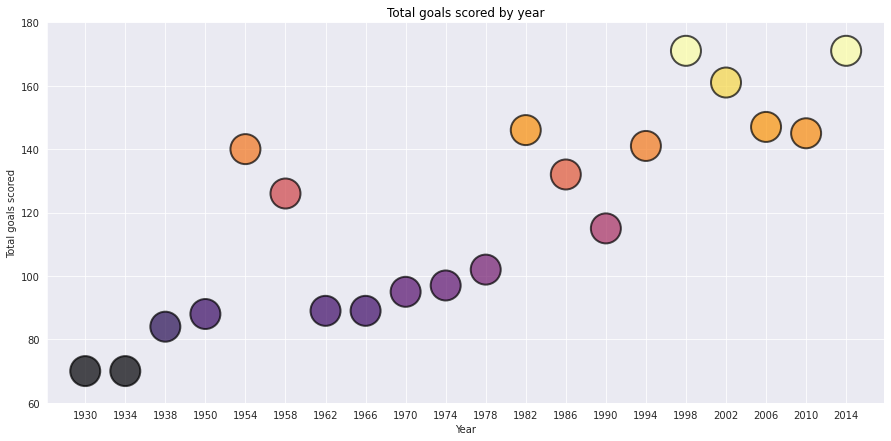

In [88]:
plt.figure(figsize=(15,7))
winners["Year1"] = winners["Year"].astype(str)

ax = plt.scatter("Year1","GoalsScored", data=winners, c=winners["GoalsScored"], 
                 cmap="inferno", s=900, alpha=.7, linewidth=2, edgecolor="k")

plt.xticks(winners["Year1"].unique())
plt.yticks(np.arange(60,200,20))
plt.title('Total goals scored by year',color='k')
plt.xlabel("Year")
plt.ylabel("Total goals scored")
plt.show()

###1.4 Total matches played and qualified teams by year

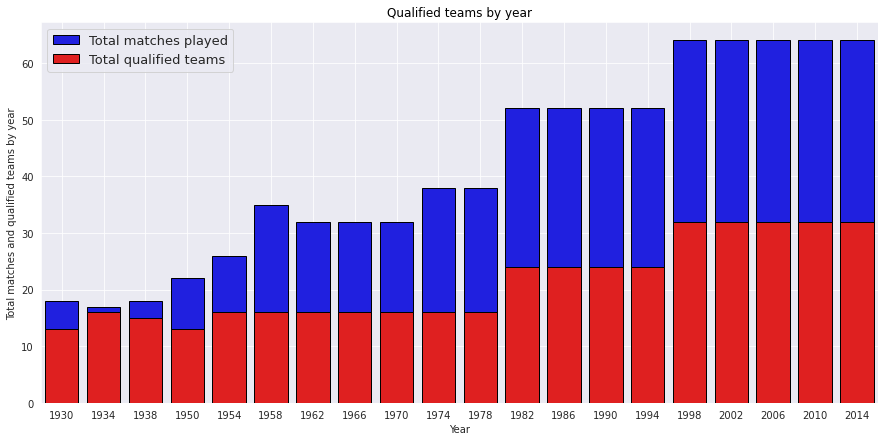

In [29]:
plt.figure(figsize=(15,7))
sns.barplot(winners["Year"], winners["MatchesPlayed"], linewidth=1,
            edgecolor="k"*len(winners), color="b", label="Total matches played")
sns.barplot(winners["Year"], winners["QualifiedTeams"], linewidth=1,
            edgecolor="k"*len(winners), color="r", label="Total qualified teams")
plt.legend(loc="best", prop={"size":13})
plt.title("Qualified teams by year", color='k')
plt.grid(True)
plt.ylabel("Total matches and qualified teams by year")
plt.show()

###1.5 Cities that hosted highest world cup matches

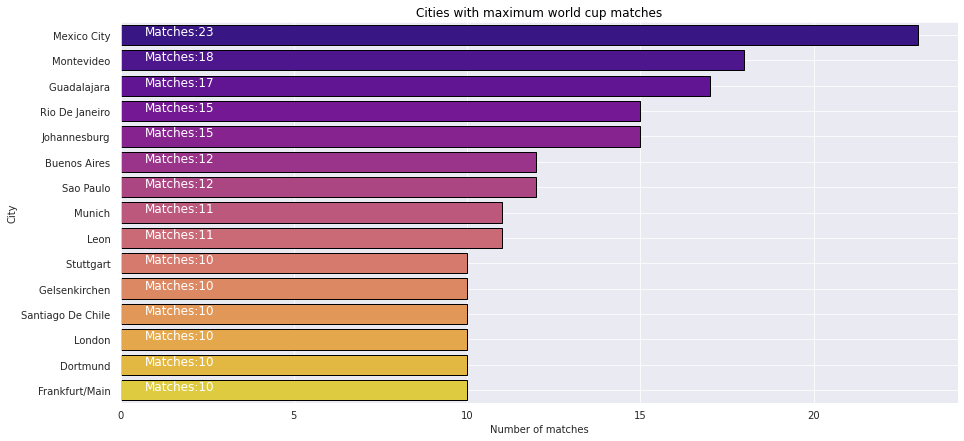

In [42]:
mat_c = matches["City"].value_counts().reset_index()

plt.figure(figsize=(15,7))
ax = sns.barplot(y = mat_c["index"][:15], x = mat_c["City"][:15], palette="plasma",
                 linewidth=1, edgecolor="k"*15)
plt.xlabel("Number of matches")
plt.ylabel("City")
plt.grid(True)
plt.title("Cities with maximum world cup matches", color='k')

for i,j in enumerate("Matches:" + mat_c["City"][:15].astype(str)):
    ax.text(.7, i, j, fontsize = 12, color="w")
plt.show()

###1.6 Average attendance by city

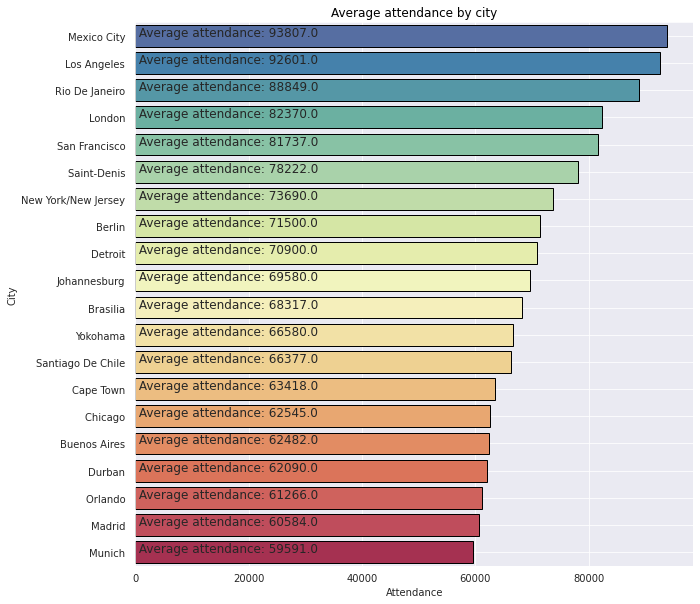

In [85]:
ct_at = matches.groupby("City")["Attendance"].mean().reset_index()
ct_at = ct_at.sort_values(by="Attendance", ascending=False)

plt.figure(figsize=(10,10))

ax = sns.barplot("Attendance", "City", data=ct_at[:20],
            linewidth = 1, edgecolor = "k"*20, palette  = "Spectral_r")

for i,j in enumerate(" Average attendance: "+ np.around(ct_at["Attendance"][:20],0).astype(str)):
    ax.text(.7,i,j,fontsize=12)
plt.grid(True)

plt.title("Average attendance by city",color='k')
plt.show()

##2. Detail about teams and matches

###2.1. Teams with the most world cup final victories 

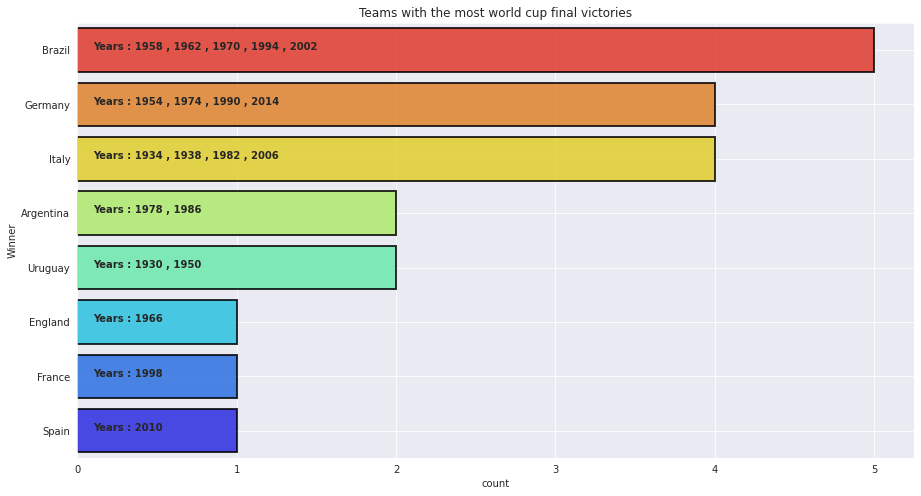

In [91]:
c1  = winners.groupby("Winner")["Year1"].apply(" , ".join).reset_index()
c2  = winners.groupby("Winner")['Year'].count().reset_index()
c12 = c1.merge(c2, left_on="Winner", right_on="Winner", how="left")
c12 = c12.sort_values(by = "Year",ascending =False)

plt.figure(figsize=(15,8))
ax = sns.barplot("Year","Winner",data=c12,
            palette="jet_r",
            alpha=.8,
            linewidth=2,
            edgecolor="k"*len(c12))
for i,j in enumerate("Years : " + c12["Year1"]):
    ax.text(.1,i,j,weight = "bold")

plt.title("Teams with the most world cup final victories")
plt.grid(True)
plt.xlabel("count")
plt.show()

###2.2 World cup final results by nation

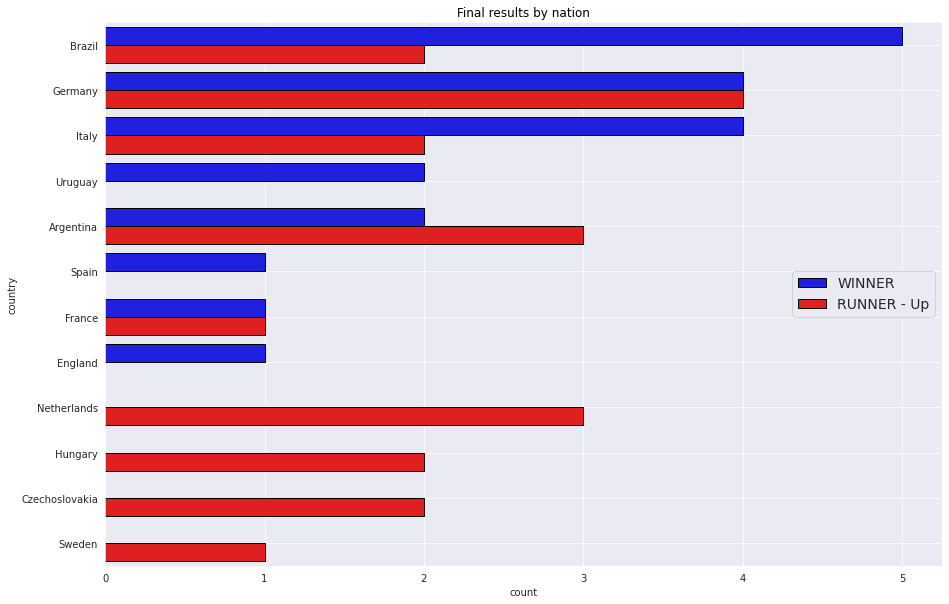

In [62]:
cou = winners["Winner"].value_counts().reset_index()
cou_w = cou.copy()
cou_w.columns = ["country","count"]
cou_w["type"] = "WINNER"

cou_r = winners["Runners-Up"].value_counts().reset_index()
cou_r.columns = ["country","count"]
cou_r["type"] = "RUNNER - Up"

cou_t = pd.concat([cou_w,cou_r], axis=0)

plt.figure(figsize=(15,10))
sns.barplot("count","country", data=cou_t,
            hue="type", palette=["b","r"],
            linewidth=1, edgecolor="k"*len(cou_t))
plt.grid(True)
plt.legend(loc="center right",prop={"size":14})
plt.title("Final results by nation",color='k')
plt.show()

###2.3 World cup final result for third and fourth place by nation

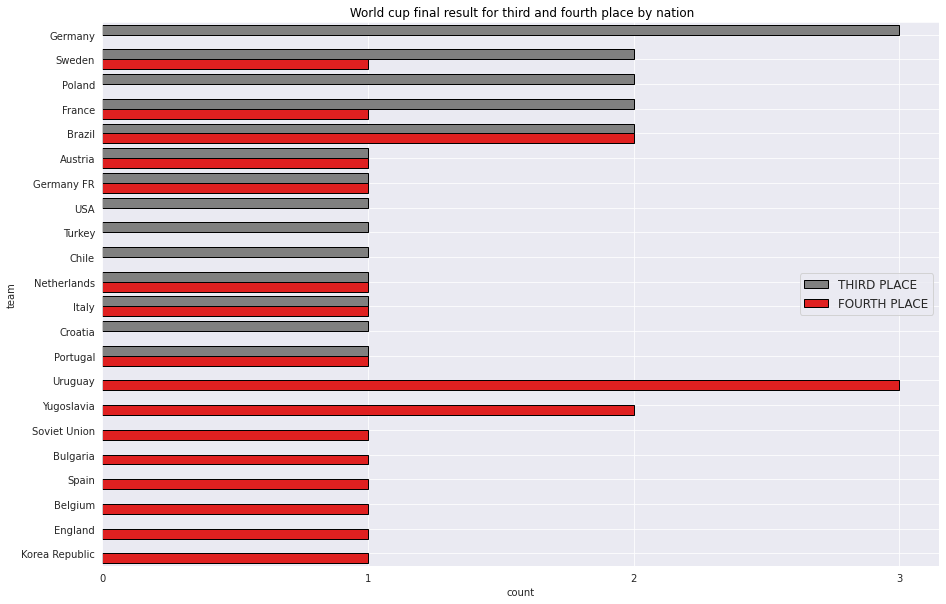

In [52]:
thrd = winners["Third"].value_counts().reset_index()
thrd.columns = ["team","count"]
thrd["type"] = "THIRD PLACE"

frth = winners["Fourth"].value_counts().reset_index()
frth.columns = ["team","count"]
frth["type"] = "FOURTH PLACE"

plcs = pd.concat([thrd,frth],axis=0)

plt.figure(figsize=(15,10))
sns.barplot("count","team",data=plcs,hue="type",
           linewidth=1,edgecolor="k"*len(plcs),
           palette = ["grey","r"])
plt.grid(True)
plt.xticks(np.arange(0,4,1))
plt.title(" World cup final result for third and fourth place by nation",color='k')
plt.legend(loc="center right",prop={"size":12})
plt.show()

###2.4 Teams with the most world cup matches

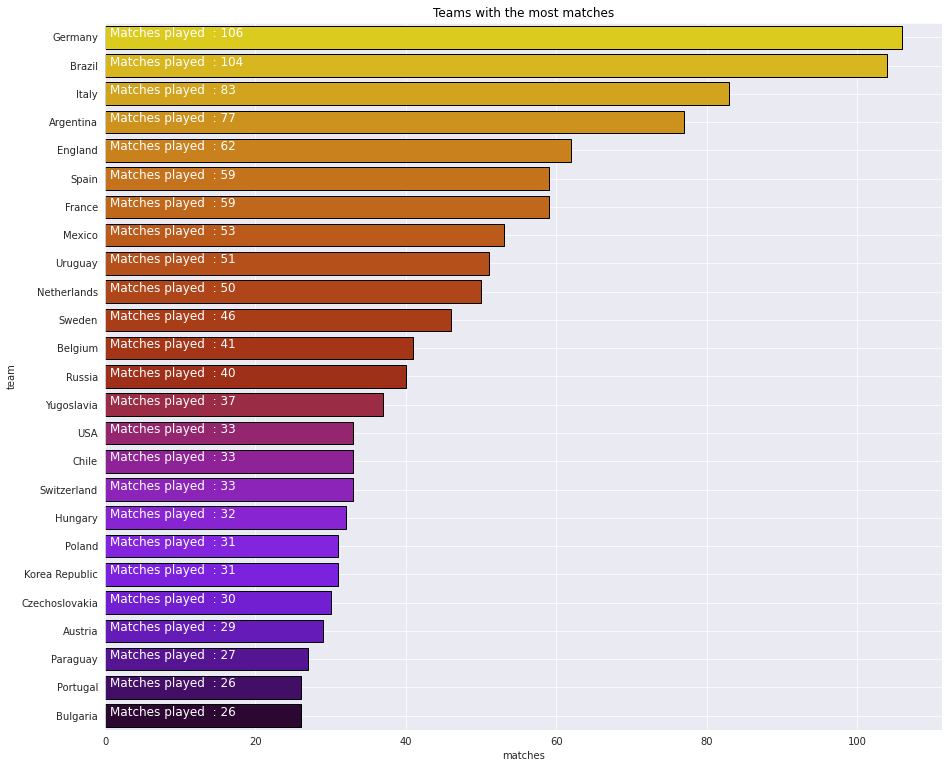

In [93]:
ht = matches["Home Team Name"].value_counts().reset_index()
ht.columns = ["team","matches"]
at = matches["Away Team Name"].value_counts().reset_index()
at.columns = ["team","matches"]
mt = pd.concat([ht,at],axis=0)
mt = mt.groupby("team")["matches"].sum().reset_index().sort_values(by="matches",ascending=False)

plt.figure(figsize=(15,13))
ax = sns.barplot("matches","team",data=mt[:25],palette="gnuplot_r",
                 linewidth=1,edgecolor="k"*25)
plt.grid(True)
plt.title("Teams with the most matches",color='k')
for i,j in enumerate("Matches played  : " + mt["matches"][:25].astype(str)):
    ax.text(.7,i,j,fontsize=12,color="white")


###2.5 Teams with the most tournament participations

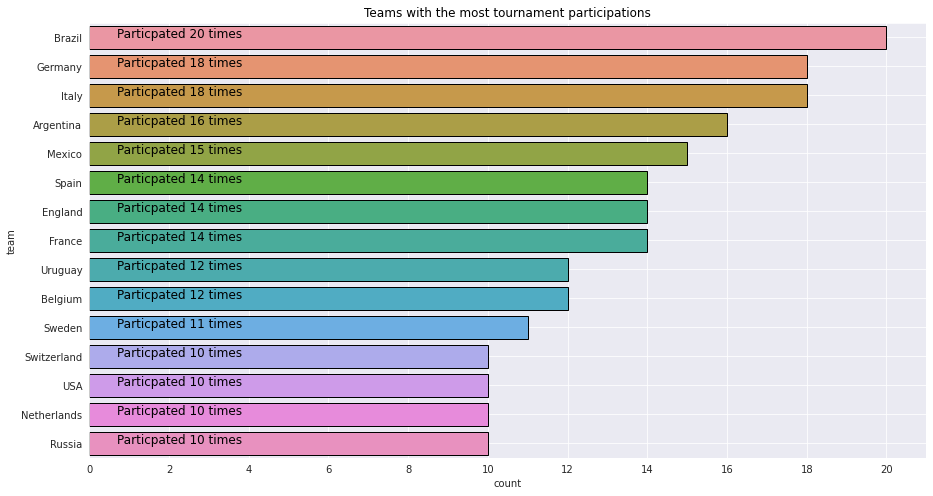

In [94]:
hy = matches[["Year","Home Team Name"]]
hy.columns = ["year","team"]
hy["type"] = "HOME TEAM"
ay = matches[["Year","Away Team Name"]]
ay.columns = ["year","team"]
ay["type"] = "AWAY TEAM"

home_away = pd.concat([hy,ay],axis=0)
yt = home_away.groupby(["year","team"]).count().reset_index()
yt = yt["team"].value_counts().reset_index()

plt.figure(figsize=(15,8))
ax = sns.barplot("team","index",data=yt[:15],
                 linewidth=1,edgecolor="k"*15)

for i,j in enumerate("Particpated " + yt["team"][:15].astype(str) + " times"):
    ax.text(.7,i,j,fontsize=12,color="k")
plt.grid(True)
    
plt.title("Teams with the most tournament participations",color='k')
plt.ylabel("team")
plt.xlabel("count")
plt.xticks(np.arange(0,22,2))
plt.show()

###2.6 Match outcomes by countries

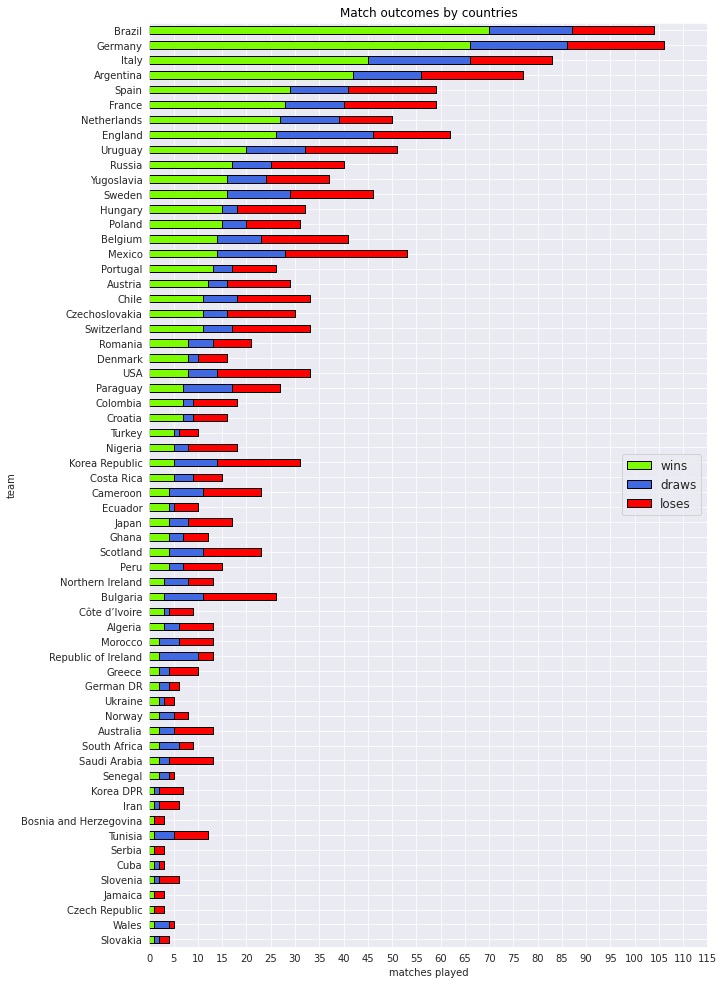

In [95]:
def label(matches):
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return "Home team win"
    if matches["Away Team Goals"] > matches["Home Team Goals"]:
        return "Away team win"
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"

matches["outcome"] = matches.apply(lambda matches:label(matches),axis=1)

matches[['Home Team Name','Home Team Goals', 'Away Team Goals', 'Away Team Name',"outcome"]]

def win_label(matches):
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return matches["Home Team Name"]
    if matches["Home Team Goals"] < matches["Away Team Goals"]:
        return matches["Away Team Name"]
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"
    
def lst_label(matches):
    if matches["Home Team Goals"] < matches["Away Team Goals"]:
        return matches["Home Team Name"]
    if matches["Home Team Goals"] > matches["Away Team Goals"]:
        return matches["Away Team Name"]
    if matches["Home Team Goals"] == matches["Away Team Goals"]:
        return "DRAW"
    
matches["win_team"]  = matches.apply(lambda matches:win_label(matches),axis=1)
matches["lost_team"] = matches.apply(lambda matches:lst_label(matches),axis=1)
lst = matches["lost_team"].value_counts().reset_index()
win = matches["win_team"].value_counts().reset_index()
wl  = win.merge(lst,left_on="index",right_on="index",how="left")
wl = wl[wl["index"] != "DRAW"]
wl.columns  = ["team","wins","loses"]

wl1 = wl.copy()
wl1 = wl1.merge(mt,left_on="team",right_on="team",how="left")
wl1["draws"] = wl1["matches"]-(wl1["wins"]+wl1["loses"])
wl1.index = wl1.team
wl1 = wl1.sort_values(by="wins",ascending=True)
wl1[["wins","draws","loses"]].plot(kind="barh",stacked=True,figsize=(10,17),
                                 colors=["lawngreen","royalblue","r"],
                                  linewidth=1,edgecolor="k"*len(wl1))
plt.legend(loc="center right",prop={"size":12})
plt.xticks(np.arange(0,120,5))
plt.title("Match outcomes by countries",color='k')
plt.xlabel("matches played")
plt.show()